# Practice Session 8: Covariance and Correlation

In [81]:
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import spearmanr, pearsonr, shapiro
 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Up to now we have focused on describing single variables, their means, spreads, and distributions. In other words, we have summarized each variable on its own.

However, in most real-world datasets, variables do not exist in isolation. They often *change together*. For example, as one measurement increases, another might also tend to increase or decrease. The next logical step is therefore to explore relationships between variables.

In yesterday’s practice session, when we worked with ANOVA, we already started thinking about such relationships by asking how one categorical factor affects a numeric response.
Today we will continue along the same line of reasoning, but from a slightly different perspective. Instead of comparing group means, we will look at how two numeric variables vary together.

This brings us to two important concepts:
- Covariance, which measures how two variables vary together
- Correlation, which standardizes that relationship on a scale from −1 to +1

Before we look at the formulas, let us start with a visual example. In the Palmer Penguins dataset, we have already explored single variables such as flipper length or body mass in earlier exercises.
Now we will use scatterplots to examine how pairs of continuous variables relate to each other. For instance, we can ask whether penguins with longer flippers also tend to be heavier, or whether longer bills tend to have less depth.

#### <font color="#fc7202">Task 1:</font>
Use scatterplots to visualize how two continuous variables in the Palmer Penguins dataset relate to each other.\
Start by plotting the variables without distinguishing species, to see the overall pattern in the data.\
Then, create the same plots again but color the points by species to check whether the relationship differs among penguin species.

Focus on the following pairs of variables:
- Flipper length (`flipper_length_mm`) and body mass (`body_mass_g`)
- Bill length (`bill_length_mm`) and bill depth (`bill_depth_mm`)


In [ ]:
# YOUR CODE HERE!

> The scatterplots above give a first visual impression of how closely two numeric variables are related.
>
> In the top row, we see the relationship between *flipper length* and *body mass*.
> - When looking at all penguins together (left plot), there is a clear upward trend: penguins with longer flippers tend to be heavier.
> - When we color the points by species (right plot), this positive pattern becomes even clearer within each group. Gentoo penguins are generally both larger and heavier, while Adelie and Chinstrap penguins cluster at smaller body sizes.
>
> In the bottom row, the plots show *bill length* versus *bill depth*.
> - Across all penguins (left plot), the points form a scattered, somewhat downward pattern.
> - When colored by species (right plot), distinct clusters appear. Gentoo penguins have longer but shallower bills, Chinstraps tend to have long and relatively narrow bills, while Adelies have shorter and deeper bills. When combined, these species differences create an overall negative relationship between bill length and bill depth.
>
> These examples highlight two key features of relationships between variables:
> - Strength - how tightly the data points follow a trend
> - Direction - whether the trend slopes upward (positive) or downward (negative)
> Scatterplots provide an intuitive first look at these relationships. In the next step, we will learn how to describe them numerically using covariance and correlation.
>
> But before we do that, it is worth checking out what the `pairplot()` function from `seaborn` can do

In [ ]:
# YOUR CODE HERE!

#### Correlation Coefficient  

So far, our scatterplots have shown visually whether two variables move together and in what direction.\
To make this idea more precise, we can describe the **strength** and **direction** of a relationship with a single number: the **correlation coefficient**.  

The most common version is **Pearson’s correlation coefficient** (Pearson product moment correlation coefficient), usually denoted as *r*.  
It measures the **linear association** between two continuous variables and always takes a value between −1 and +1:  

- *r = +1* → perfect positive linear relationship  
- *r = 0* → no linear relationship  
- *r = −1* → perfect negative linear relationship  

Values close to +1 or −1 indicate strong associations, while values near 0 indicate weak or no linear relationship.  


**Covariance - the idea behind correlation** 

To understand correlation, it helps to first look at **covariance**.  
Covariance is a generalization of variance that measures how two variables vary together:  

$$\text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$$


If both variables tend to move in the same direction (both increase or both decrease together), the covariance is **positive**.  
If one tends to increase when the other decreases, it is **negative**.  
If they are completely unrelated, the covariance is approximately **zero**.  

However, covariance is expressed in the **combined units** of both variables (for example, millimeters × grams), which makes it difficult to interpret.  


**Standardizing the covariance**  

Pearson’s correlation fixes this by **standardizing** the covariance, dividing it by the standard deviations of both variables:  
$$r = \frac{\text{Cov}(X, Y)}{s_X \, s_Y}$$ $$\boxed{r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2 \sum_{i=1}^{n}(y_i - \bar{y})^2}}}$$

This removes the units and constrains the result to the range from −1 to +1.  
The resulting *r* keeps the same sign as the covariance (positive or negative) but now has a **meaningful scale** that can be compared across variable pairs.  


In the *Palmer Penguins* dataset, for example:  
- *Flipper length* and *body mass* are expected to have a **strong positive correlation**, since heavier penguins tend to have longer flippers.  
- *Bill length* and *bill depth* show a **negative correlation**, as species with longer bills generally have shallower ones.  

In the next section, we will calculate these correlations in Python and examine what the resulting numbers tell us.


#### <font color="#fc7202">Task 2:</font>  
Compute and interpret **Pearson’s correlation coefficients** for selected pairs of variables in the *Palmer Penguins* dataset.  

1. Use the `.corr()` method in pandas to calculate the correlation between:  
   - **Flipper length** (`flipper_length_mm`) and **body mass** (`body_mass_g`)  
   - **Bill length** (`bill_length_mm`) and **bill depth** (`bill_depth_mm`)  

2. Interpret the sign and magnitude of each correlation coefficient:  
   - Is the relationship positive or negative?  
   - Does it appear weak, moderate, or strong?  
   - Do the numerical results match what you observed in the scatterplots? 

3. Compute a full correlation matrix for all numeric variables to see how all pairs of measurements relate to one another.
    - Which variable pair shows the strongest linear relationship?
    - Does the correlation confirm what you saw in the scatterplots?
    - Why is it useful that the correlation coefficient is unitless?

In [13]:
# YOUR CODE HERE!

**Visualizing correlation patterns**  

Besides scatterplots, **heatmaps** are also often used to visualize correlations between variables.
They provide a compact overview of how all numeric variables relate to each other.
As we can see below, we can directly plot the **Pearson correlation coefficients for all variable pairs in the dataset, where the color indicates both the direction (positive or negative) and the strength of the relationship.

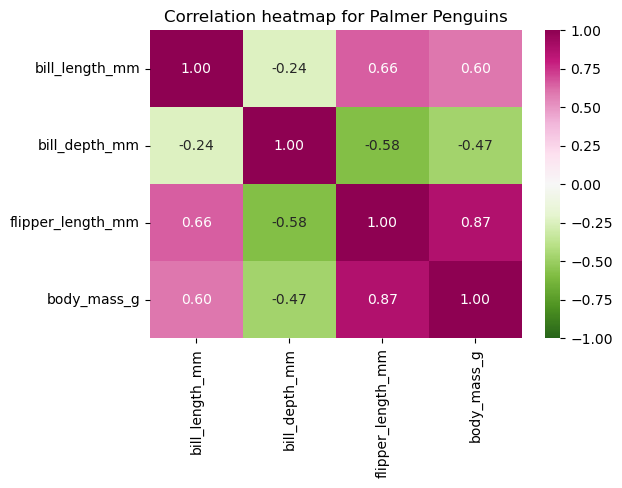

In [39]:
corr = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='PiYG_r', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation heatmap for Palmer Penguins')
plt.show()


**Interpreting correlation values**\
Naturally, in real data you rarely see correlations of exactly +1 or −1. So how should we interpret a correlation of, say, 0.4 or 0.7?
The answer depends on both the context and the discipline.

For example:
- In engineering, correlations below 0.9 might be considered weak
- In psychology or environmental sciences, correlations around 0.5 are already considered meaningful.
- In many biological or social datasets, even smaller correlations can be important if they are consistent and statistically significant.

In short, interpretation depends on what the data represent and how strong relationships typically are in that field.
Still, a rough descriptive guide like the one below is widely used:
| Correlation  | Strength    | Direction |
| ------------ | ----------- | --------- |
| −1.0 to −0.9 | Very strong | Negative  |
| −0.9 to −0.7 | Strong      | Negative  |
| −0.7 to −0.4 | Moderate    | Negative  |
| −0.4 to −0.2 | Weak        | Negative  |
| −0.2 to 0.0  | Negligible  | Negative  |
| 0.0 to 0.2   | Negligible  | Positive  |
| 0.2 to 0.4   | Weak        | Positive  |
| 0.4 to 0.7   | Moderate    | Positive  |
| 0.7 to 0.9   | Strong      | Positive  |
| 0.9 to 1.0   | Very strong | Positive  |

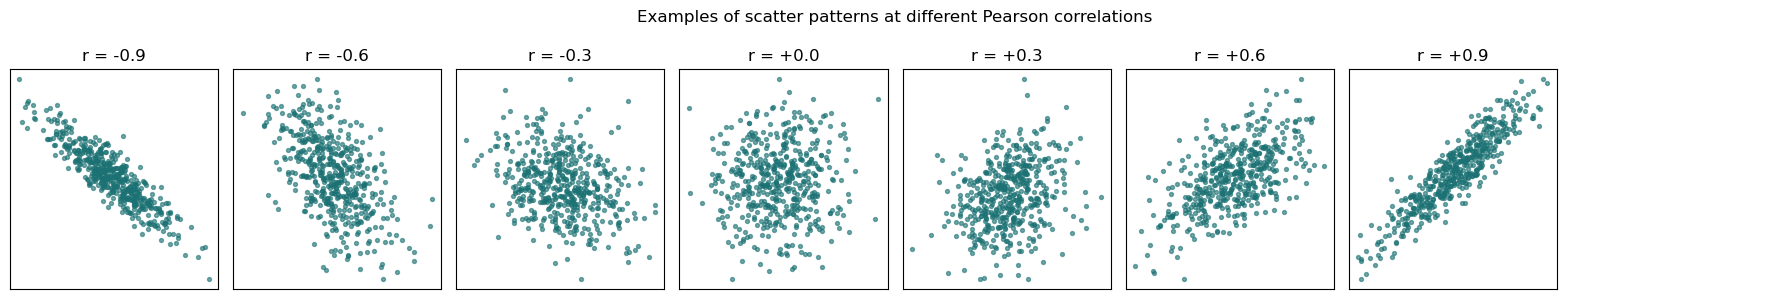

In [57]:
# Visualizing the correlations: -0.9, -0.6, -0.3, 0.0, 0.3, 0.6, 0.9
np.random.seed(42)
rs = [-0.9, -0.6, -0.3, 0.0, 0.3, 0.6, 0.9]
fig, axes = plt.subplots(1, 8, figsize=(18, 3))
axes = axes.ravel()
for i, r in enumerate(rs):
    cov = np.array([[1, r],[r, 1]])
    xy = np.random.multivariate_normal(mean=[0,0], cov=cov, size=500)
    ax = axes[i]
    ax.scatter(xy[:,0], xy[:,1], s=8, alpha=0.6, color='#1b7173')
    ax.set_title(f'r = {r:+.1f}')
    ax.set_xticks([]); ax.set_yticks([])
axes[-1].axis('off')
fig.suptitle('Examples of scatter patterns at different Pearson correlations', y=0.98)
plt.tight_layout()
plt.show()

However, one thing cannot be emphasized enough: a single correlation value can be misleading if you do not look at the data.

Two datasets can have exactly the same correlation, yet show completely different patterns when visualized.
This is why visualization is such an essential part of data analysis.

To demonstrate this, let’s return to a dataset we first encountered in the very first practice session - the Anscombe dataset.
It was originally created by Francis Anscombe (1973) precisely to illustrate this point.

> *Recall:* Each of the four datasets in Anscombe’s Quartet has two variables (*x* and *y*).
> All four share almost identical summary statistics - but they look completely different when plotted.

#### <font color="#fc7202">Task 3:</font>  
Visualize **all four** datasets from **Anscombe’s Quartet**, then compute the **Pearson correlation coefficient** for each and compare the results.

Reflect on what this result means:
- If all four datasets have the same correlation coefficient, does that mean they look the same?
- What does this tell you about the limitations of using a single correlation coefficient value to describe a relationship?

> *Hint:* To load the data, use `sns.load_dataset('anscombe')`.


In [ ]:
# YOUR CODE HERE!

This example highlights one of the main limitations of the Pearson correlation coefficient.\
Although it is extremely useful, it only measures the strength of a **linear** relationship between two variables.\
In other words, it captures how well the data points align along a straight line.

In many cases this is perfectly fine - many of the relationships we study are roughly linear, and Pearson’s *r* gives a good summary.\
However, sometimes two variables can be strongly related in a nonlinear way, and Pearson’s correlation will fail to capture that.

For example, the relationship between two variables can be monotonic but nonlinear - that is, as one variable increases, the other also increases, but not at a constant rate.
In such cases, Pearson’s *r* may underestimate how strongly the variables are related.

To handle this, we can use Spearman’s rank correlation, often denoted as *ρ*.
It measures how well the relationship between two variables can be described by a monotonic function rather than a straight line.
In other words, it assesses whether the order (rank) of the values in one variable corresponds to the order in the other.

**Spearman’s rank correlation formulas**

If there are **no tied ranks**, Spearman’s *ρ* can be computed directly from the rank differences:
$$\rho = 1 - \frac{6\sum d_i^2}{n(n^2 - 1)}$$
where:  
- $n$ = number of observations  
- $d_i = R(x_i) - R(y_i)$ = difference between the ranks of $x_i$ and $y_i$

If there **are tied ranks**, we must first convert both variables to their **ranked values**, and then apply the Pearson correlation formula to these ranks:
$$\rho = \frac{\text{cov}(R_X, R_Y)}{s_{R_X}\, s_{R_Y}}$$
where:  
- $R_X, R_Y$ are the rank-transformed variables  
- $s_{R_X}, s_{R_Y}$ are the standard deviations of the ranks  

Both formulas produce the same result when no ties are present.

**Let’s look at a simple example.**\
Suppose you want to find out whether there is any relationship between students’ performance in two subjects - Physics and Mathematics.

You have the exam scores for nine students:
- **Physics:** 35, 23, 47, 17, 10, 43, 9, 6, 28  
- **Mathematics:** 45, 18, 100, 12, 8, 70, 6, 5, 28 

To answer this question, you can calculate the Spearman rank correlation coefficient, which measures how well the rankings of students in one subject correspond to their rankings in the other.

1. **Rank each variable (ascending; smallest = 1)**

Physics values in ascending order: 6, 9, 10, 17, 23, 28, 35, 43, 47\
Ranks $R_P$: 6→1, 9→2, 10→3, 17→4, 23→5, 28→6, 35→7, 43→8, 47→9  

Mathematics values in ascending order: 5, 6, 8, 12, 18, 28, 45, 70, 100   
Ranks $R_M$: 5→1, 6→2, 8→3, 12→4, 18→5, 28→6, 45→7, 70→8, 100→9

2. **Create the rank table and compute $d_i$ and $d_i^2$**

| Student | Physics | Mathematics | $R_P$ | $R_M$ | $d_i = R_P - R_M$ | $d_i^2$ |
|:------:|--------:|------------:|--------:|--------:|---------------------:|----------:|
| 1 | 35 | 45  | 7 | 7 | 0 | 0 |
| 2 | 23 | 18  | 5 | 5 | 0 | 0 |
| 3 | 47 | 100 | 9 | 9 | 0 | 0 |
| 4 | 17 | 12  | 4 | 4 | 0 | 0 |
| 5 | 10 | 8   | 3 | 3 | 0 | 0 |
| 6 | 43 | 70  | 8 | 8 | 0 | 0 |
| 7 | 9  | 6   | 2 | 2 | 0 | 0 |
| 8 | 6  | 5   | 1 | 1 | 0 | 0 |
| 9 | 28 | 28  | 6 | 6 | 0 | 0 |

$\sum d_i^2 = 0$

3. **Apply the formula**
Since there are **no rank differences**, we can calculate:
$\rho = 1 - \frac{6 \cdot 0}{9(9^2 - 1)} = 1 - 0 = 1.0$

The Spearman rank correlation is **ρ = 1.0**, indicating a **perfect positive monotonic relationship**.  


#### <font color="#fc7202">Task 4:</font>  
Explore the relationship between students’ scores in **Physics** and **Mathematics** using both **Spearman’s** and **Pearson’s** correlation coefficients.

**Data**
- Physics: 35, 23, 47, 17, 10, 43, 9, 6, 28  
- Mathematics: 45, 18, 100, 12, 8, 70, 6, 5, 28  

1. Visualize the data\
    Create a scatterplot to inspect whether the relationship looks linear or nonlinear.
2. Compute Spearman’s correlation
3. Compute Pearson’s correlation
4. Interpret and compare

In [ ]:
# YOUR CODE HERE!

#### <font color="#fc7202">Task 5:</font>  
Prior to the start of the final games of the **FIBA Basketball World Cup 2023**, students at Stockholm University predicted the final ranking of the last eight teams. The file `FIBA2023.tsv` contains the **actual finishing order** and each **student’s predicted order**.

- Compute the **Spearman rank correlation** between each student’s ranking and the actual finishing order.  
- Determine for which student(s) the correlation is **not significantly different from zero** at the 95% confidence level.


In [ ]:
# YOUR CODE HERE!

#### <font color="#fc7202">Task 6:</font>

Use the `animals.tsv` dataset to study the association between **body mass** and **brain weight**.

The dataset contains brain weight and body mass for 28 species: 24 mammals plus humans and three dinosaurs (Brachiosaurus, Diplodocus, Triceratops). The brain-body mass ratio is sometimes used as a rough proxy for encephalization. For this exercise we ignore phylogenetic nonindependence.


1. Visualize the relationship between brain and body weight
    - Create a scatterplot of brain vs body.
    - Highlight humans and dinosaurs in the plot using different colors.

2. Explore distributions
    - Create histograms of body and brain weights.
    - Observe if the distributions are strongly skewed.

3. Test normality
    - Perform a Shapiro–Wilk test for both body and brain
    - Compare *p*-values to the 0.05 significance level

4. Calculate correlation coefficients
    - Compute the Pearson correlation between body and brain weight.
    - Compute the Spearman rank correlation between body and brain weight.
    - Report both the correlation coefficients and their *p*-values.

5. Recalculate correlations excluding the dinosaurs to see how much they influence the relationship.

In [ ]:
# YOUR CODE HERE!

#### <font color="#fc7202">Let’s play: Guess the correlation!</font>

- **Game 1:** Guess The Correlation → <https://www.guessthecorrelation.com/>
- **Game 2:** GeoGebra “Guess r” → <https://www.geogebra.org/m/KE6JfuF9>

#### Coefficient of Determination (R²)

So far, we’ve used the **correlation coefficient (r)** to describe the *strength and direction* of a linear relationship between two variables.  
However, we can also express this relationship in terms of how much **variation** in one variable is *explained* by the other.

That’s where the **coefficient of determination**, denoted **R²**, comes in.

**What is R²?**
R² is the proportion of the variation in the dependent variable that is predictable from the independent variable(s). It is a statistic used in the context of statistical models whose main purpose is either the prediction of future outcomes or the testing of hypotheses, on the basis of other related information. It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model.


When we fit a linear regression model  $\hat{y}_i = a + b x_i$ we can think of the total variation in the observed values $y_i$ as being divided into two parts:

- **Explained (model) variation** - how much of the total variability in $y$ is explained by the regression line.
- **Unexplained (residual) variation** - the remaining variability around the line.

Mathematically, this decomposition uses **sums of squares**: $SS_\text{total} = SS_\text{regression} + SS_\text{residual}$, where:
- $SS_\text{total} = \sum_i (y_i - \bar{y})^2$
- $SS_\text{regression} = \sum_i (\hat{y}_i - \bar{y})^2$
- $SS_\text{residual} = \sum_i (y_i - \hat{y}_i)^2$

**Defining R² from sums of squares**

The **coefficient of determination** is the **proportion of total variance explained** by the model:

$R^2 = \frac{SS_\text{regression}}{SS_\text{total}}$

Since $SS_\text{residual} = SS_\text{total} - SS_\text{regression}$, we can also write: $R^2 = 1 - \frac{SS_\text{residual}}{SS_\text{total}}$

This second form highlights that **smaller residuals → higher R²**.

**Connection to correlation**

In a simple linear regression with only one predictor $x$, the value of $R^2$ will always equal the **square of the Pearson correlation** between $x$ and $y$: $R^2 = r_{xy}^2$

But in multiple regression (with more than one predictor), R² is still computed from the sums of squares, not directly from correlation.



#### <font color="#fc7202">Task 7:</font>

Using your dataset from **Task 6**, fit a **simple linear regression model** to predict **brain weight** from **body weight**.  
Compute the **coefficient of determination (R²)** to assess how well body weight explains variation in brain weight.  
Then, **interpret** the result in plain language and **examine the residuals** to evaluate the quality of the model fit.

In [ ]:
# YOUR CODE HERE!

#### <font color="#fc7202">Task 8:</font> 
You are given a file `toxicity.tsv` containing measurements for chemicals:
- **Octanol/Water partition coefficient** (a hydrophobicity measure; often `Kow` or `logKow`)
- **LC50** for fathead minnows (lethal concentration for 50%) in **mmol/L**

1. **Visualize** the relationship between the partition coefficient and LC50.  
2. Compute the **Pearson correlation coefficient (r)** and the corresponding **coefficient of determination (R²)**.  
3. Compute the **Spearman rank correlation coefficient (ρ)** to check for a monotonic (not necessarily linear) association.  
4. **Interpret your results:**  
   - Describe the **direction** (positive/negative) and **strength** of the relationship.  
   - Compare Pearson’s *r* and Spearman’s *ρ* - are they similar or different?  
   - Check whether each correlation is **statistically significant** (using the *p*-value).  
   - Explain what the **R²** value means in this context.  

In [ ]:
# YOUR CODE HERE!